In [1]:
import sys
import os
current_path = os.getcwd()  # 获取当前工作目录
print("当前路径:", current_path)
current_path = current_path.replace('/samples', '')
print(sys.path)  # 显示所有模块搜索路径
sys.path.append(current_path)  # 添加自定义路径
print(sys.path)  # 显示所有模块搜索路径

当前路径: /Users/yang/PycharmProjects/Option/samples
['/Users/yang/PycharmProjects/Option/samples', '/Users/yang/PycharmProjects/Option', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/pydev', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/jupyter_debug', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa']
['/Users/yang/PycharmProjects/Option/samples', '/Users/yang/PycharmProjects/Option', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/pydev', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/jupyter_debug', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa', '/Users/yang/PycharmProjects/Option']


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np 
import QuantLib as ql 
import math
from datetime import datetime

from src.QlCalendar import QlCalendar
from src.QlStocks import QlStocks
from src.QlEuropeanOptions import QlEuropeanOptions

# yfinance 动态获取期权值

In [3]:
# ticker = 'TSLA'
# 
# tsla = yf.Ticker(ticker)

In [4]:
# expiration_dates = tsla.options

In [5]:
# selected_date = expiration_dates[0]
# selected_date

In [6]:
# option_chain = tsla.option_chain(selected_date)

# 本地的示例

In [7]:
df = pd.read_csv(r'../data/calls.csv', index_col=0)
df

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TSLA250530C00050000,2025-05-23 18:30:52+00:00,50.0,290.95,288.05,290.70,7.000000,2.465223,5.0,8,5.531253,True,REGULAR,USD
1,TSLA250530C00055000,2025-05-20 14:32:36+00:00,55.0,289.80,283.00,285.70,0.000000,0.000000,6.0,12,4.750004,True,REGULAR,USD
2,TSLA250530C00080000,2025-04-23 14:28:59+00:00,80.0,175.60,258.05,260.75,0.000000,0.000000,1.0,1,4.390630,True,REGULAR,USD
3,TSLA250530C00090000,2025-04-28 15:25:29+00:00,90.0,186.00,248.05,250.75,0.000000,0.000000,NaN,10,4.039067,True,REGULAR,USD
4,TSLA250530C00100000,2025-05-23 19:16:34+00:00,100.0,241.58,238.05,240.75,-3.419998,-1.395918,1.0,0,3.726563,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,TSLA250530C00660000,2025-05-21 14:46:41+00:00,660.0,0.01,0.00,0.01,0.000000,0.000000,8.0,62,1.625002,False,REGULAR,USD
138,TSLA250530C00670000,2025-05-21 13:33:06+00:00,670.0,0.02,0.00,0.01,0.000000,0.000000,1.0,70,1.656252,False,REGULAR,USD
139,TSLA250530C00680000,2025-05-16 15:53:53+00:00,680.0,0.03,0.00,0.01,0.000000,0.000000,16.0,16,1.687502,False,REGULAR,USD
140,TSLA250530C00690000,2025-05-20 15:14:21+00:00,690.0,0.01,0.00,0.01,0.000000,0.000000,4.0,11,1.718751,False,REGULAR,USD


In [8]:
calculation_date = ql.Date(23, 5, 2025)  # 当前日期设为2025-05-23
strike_date = ql.Date(30,5,2025)
ql.Settings.instance().evaluationDate = calculation_date

In [9]:
# 市场参数
spot_price = 339.340  # 当前TSLA股价
risk_free_rate = 0.05  # 无风险利率
dividend_rate = 0.0  # 股息率

In [10]:
ql_calendar = QlCalendar(init_date=calculation_date, init_risk_free_rate=risk_free_rate)
ql_stocks = QlStocks(ql_calendar)

In [11]:
ql_stocks.add_black_scholes(codes="TSLA", stock_prices=spot_price, sigma=0.70)
tsla = ql_stocks.stock('TSLA')

In [12]:
tsla_options = QlEuropeanOptions(tsla)  
tsla_options.add_options(
    option_types = 'call',
    strike_prices = df['strike'].values,
    maturity_dates = strike_date,
    codes = df['contractSymbol'].values
)

codes                types  strike  maturity      
TSLA250530C00050000  call   50.0    May 30th, 2025    <QuantLib.QuantLib.EuropeanOption; proxy of <S...
TSLA250530C00055000  call   55.0    May 30th, 2025    <QuantLib.QuantLib.EuropeanOption; proxy of <S...
TSLA250530C00080000  call   80.0    May 30th, 2025    <QuantLib.QuantLib.EuropeanOption; proxy of <S...
TSLA250530C00090000  call   90.0    May 30th, 2025    <QuantLib.QuantLib.EuropeanOption; proxy of <S...
TSLA250530C00100000  call   100.0   May 30th, 2025    <QuantLib.QuantLib.EuropeanOption; proxy of <S...
                                                                            ...                        
TSLA250530C00660000  call   660.0   May 30th, 2025    <QuantLib.QuantLib.EuropeanOption; proxy of <S...
TSLA250530C00670000  call   670.0   May 30th, 2025    <QuantLib.QuantLib.EuropeanOption; proxy of <S...
TSLA250530C00680000  call   680.0   May 30th, 2025    <QuantLib.QuantLib.EuropeanOption; proxy of <S...
TSLA250530C00

In [13]:
# 解析解 引擎
tsla_options.analytic_engines()

# calculate NPV

In [14]:
df_iv = tsla_options.NPV()
df_iv

array([2.89387922e+02, 2.84392714e+02, 2.59416676e+02, 2.49426260e+02,
       2.39435844e+02, 2.29445429e+02, 2.19455013e+02, 2.09464598e+02,
       2.04469390e+02, 1.99474182e+02, 1.89483767e+02, 1.84488559e+02,
       1.79493351e+02, 1.74498143e+02, 1.69502936e+02, 1.64507728e+02,
       1.59512520e+02, 1.54517312e+02, 1.49522104e+02, 1.44526897e+02,
       1.39531689e+02, 1.34536482e+02, 1.29541275e+02, 1.24546072e+02,
       1.19550878e+02, 1.14555712e+02, 1.09560618e+02, 1.04565700e+02,
       9.95711848e+01, 9.70742089e+01, 9.45775337e+01, 9.20812835e+01,
       8.95856254e+01, 8.70907805e+01, 8.45970373e+01, 8.21047671e+01,
       7.96144408e+01, 7.71266474e+01, 7.46421146e+01, 7.21617288e+01,
       6.96865564e+01, 6.72178639e+01, 6.47571371e+01, 6.23060975e+01,
       5.98667154e+01, 5.74412192e+01, 5.50320987e+01, 5.26421034e+01,
       5.02742333e+01, 4.79317234e+01, 4.56180201e+01, 4.33367513e+01,
       4.10916893e+01, 3.88867072e+01, 3.67257307e+01, 3.46126853e+01,
      

In [15]:
compare_df = df[['contractSymbol', 'strike', 'bid', 'ask']]
compare_df

,contractSymbol,strike,bid,ask
0,TSLA250530C00050000,50.0,288.05,290.70
1,TSLA250530C00055000,55.0,283.00,285.70
2,TSLA250530C00080000,80.0,258.05,260.75
3,TSLA250530C00090000,90.0,248.05,250.75
4,TSLA250530C00100000,100.0,238.05,240.75
...,...,...,...,...
137,TSLA250530C00660000,660.0,0.00,0.01
138,TSLA250530C00670000,670.0,0.00,0.01
139,TSLA250530C00680000,680.0,0.00,0.01
140,TSLA250530C00690000,690.0,0.00,0.01


In [16]:
compare_df.loc[:, 'NPV'] = df_iv

/var/folders/v_/g8cn51c96_l31y5zbwlvt2j00000gp/T/ipykernel_48968/1926182367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_df.loc[:, 'NPV'] = df_iv


In [17]:
compare_df

,contractSymbol,strike,bid,ask,NPV
0,TSLA250530C00050000,50.0,288.05,290.70,2.893879e+02
1,TSLA250530C00055000,55.0,283.00,285.70,2.843927e+02
2,TSLA250530C00080000,80.0,258.05,260.75,2.594167e+02
3,TSLA250530C00090000,90.0,248.05,250.75,2.494263e+02
4,TSLA250530C00100000,100.0,238.05,240.75,2.394358e+02
...,...,...,...,...,...
137,TSLA250530C00660000,660.0,0.00,0.01,2.331466e-11
138,TSLA250530C00670000,670.0,0.00,0.01,7.684826e-12
139,TSLA250530C00680000,680.0,0.00,0.01,2.517181e-12
140,TSLA250530C00690000,690.0,0.00,0.01,8.197480e-13


<Axes: >

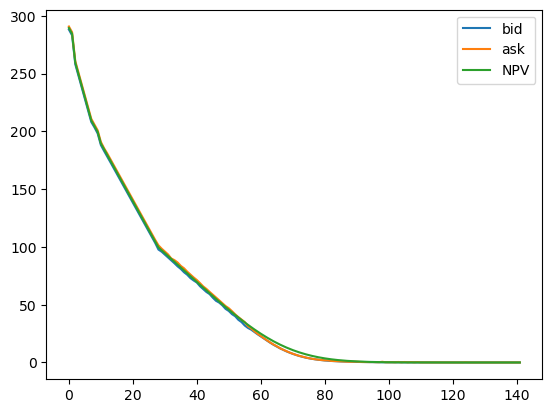

In [18]:
compare_df[['bid', 'ask', 'NPV']].plot()

In [19]:
compare_df['bid'].values

array([2.8805e+02, 2.8300e+02, 2.5805e+02, 2.4805e+02, 2.3805e+02,
       2.2805e+02, 2.1810e+02, 2.0810e+02, 2.0340e+02, 1.9810e+02,
       1.8810e+02, 1.8300e+02, 1.7815e+02, 1.7315e+02, 1.6815e+02,
       1.6315e+02, 1.5815e+02, 1.5315e+02, 1.4820e+02, 1.4320e+02,
       1.3820e+02, 1.3320e+02, 1.2820e+02, 1.2325e+02, 1.1830e+02,
       1.1330e+02, 1.0830e+02, 1.0335e+02, 9.7700e+01, 9.5850e+01,
       9.3350e+01, 9.0850e+01, 8.8250e+01, 8.5850e+01, 8.3150e+01,
       8.0900e+01, 7.8050e+01, 7.5900e+01, 7.3000e+01, 7.0950e+01,
       6.9200e+01, 6.5950e+01, 6.3450e+01, 6.1000e+01, 5.9150e+01,
       5.6050e+01, 5.3350e+01, 5.1800e+01, 4.9400e+01, 4.6350e+01,
       4.4550e+01, 4.1800e+01, 4.0000e+01, 3.6900e+01, 3.4900e+01,
       3.1950e+01, 2.9850e+01, 2.8400e+01, 2.6350e+01, 2.4400e+01,
       2.2550e+01, 2.0650e+01, 1.8750e+01, 1.7000e+01, 1.5300e+01,
       1.3750e+01, 1.2250e+01, 1.0900e+01, 9.6500e+00, 8.5000e+00,
       7.4500e+00, 6.5000e+00, 5.6500e+00, 4.9000e+00, 4.2000e

# calculate implied volatility

In [ ]:
tsla_options.impliedVolatility(compare_df['bid'].values)